# How severe was the United States of America's climate change compared to the rest of the world?


**Introduction**

The reference climate data are gathered by the Berkeley Earth and repackaged by Kaggle. Berkeley Earth was founded in 2010 to illustrate global warming by observing global temperatures and analyzing climate change from these data. This dataset contains the monthly average temperatures of cities, states, countries and the globe from 1950 to 2015. The PM2.5 Global Air Pollution 2010-2017 data is referenced by Brauer on The World Bank website.

This project aims to analyze the degree of climate change in the United States of America compared to global climate change. To achieve this goal, I will statistically graph and analyze the annual average land temperatures in the US as well as the annual global average land temperatures from 2003 to 2013. Analyzing the relation between the exposure of air pollution and the average temperatures procide a comprehensive understanding of Unite State's Climate change.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# upload the data
city_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByCity.csv")
major_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByMajorCity.csv")
state_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByState.csv")
country_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByCountry.csv")
global_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalTemperatures.csv")
pollution = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\PM2.5GlobalAirPollution.csv")

In [148]:
# data cleaning process
# drop the missing data
city_t = city_temperature.dropna()
major_t = major_temperature.dropna()
state_t = state_temperature.dropna()
country_t = country_temperature.dropna()
global_t = global_temperature.dropna()

In [149]:
# data cleaning process
# collect all the data of USA
us_city_t = city_t.groupby("Country").get_group("United States")
us_major_t = major_t.groupby("Country").get_group("United States")
us_state_t = state_t.groupby("Country").get_group("United States")

us_poll = pollution.dropna().groupby("Country Name").get_group("United States").drop(['2016', '2017'], axis=1)
us_poll_1 = us_poll.T.reset_index().drop([0, 1])
us_poll_1.rename(columns={"index": "Year", 227: "pm2.5"}, inplace=True)

The first independent variable I choose is the time zone, which is measured in years.

In [189]:
us_t = country_temperature.groupby("Country").get_group("United States")
usa_t = pd.DataFrame({"Year" : [x[:4] for x in us_t["dt"]], "Monthly Average Land Temperature" : us_t["AverageTemperature"]})

# Describe the summary statistics of the independent variable year and dependent variable Average Land Temperature
usa_t[usa_t["Year"]>"2002"].groupby("Year").describe()

Monthly Average Land Temperature                                       \
                                count       mean       std    min      25%   
Year                                                                         
2003                             12.0   9.755083  9.111083 -1.820  2.24450   
2004                             12.0   9.667500  9.005986 -3.841  2.91075   
2005                             12.0   9.892667  9.061019 -1.884  2.76300   
2006                             12.0   9.974500  8.879165 -0.574  2.05375   
2007                             12.0   9.837500  9.504001 -2.959  2.89750   
2008                             12.0   8.951417  9.346232 -3.883  1.72450   
2009                             12.0   9.137083  9.248552 -3.569  2.04725   
2010                             12.0   9.505583  9.694852 -3.610  2.05075   
2011                             12.0   9.549917  9.484540 -3.507  2.06575   
2012                             12.0  10.261083  9.061826 -2.268  2.64300   
2013                              9.0  11.297111  9.915754 -2.155  2.28900   

                                 
          50%       75%     max  
Year                             
2003  10.2400  16.94200  22.499  
2004  10.0290  17.15800  21.663  
2005   9.6430  18.17525  22.478  
2006   9.7290  16.97725  22.911  
2007   9.7040  17.95000  22.352  
2008   8.5330  17.27050  21.690  
2009   8.3530  17.61575  21.463  
2010  10.2315  18.00925  22.078  
2011   9.5360  17.75550  22.722  
2012   9.9420  17.76550  23.008  
2013  14.0730  20.19800  22.074

Text(0.5, 1.0, 'Monthly Average Land Temperature of USA from 2003 to 2013')

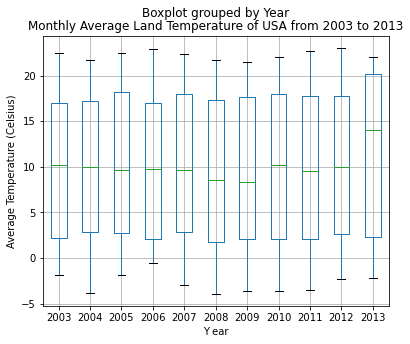

In [190]:
# graph 1
# graph the boxplot of the data of the USA from 2003 to 2013
# X : year
# Y : Average temperature (Celsius)
us_box = usa_t[usa_t["Year"]>"2002"].boxplot(by="Year", figsize=(6, 5))
us_box.set_ylabel("Average Temperature (Celsius)")
us_box.set_xlabel("Y ear")
us_box.set_title("Monthly Average Land Temperature of USA from 2003 to 2013")

Text(0.5, 1.0, 'Annual Average Land Temperature of USA from 2003 to 2013')

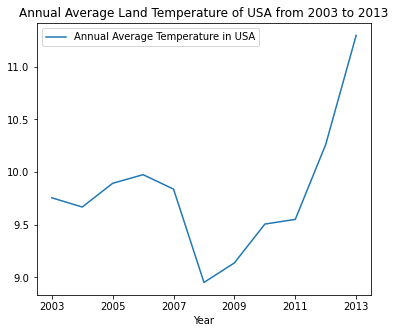

In [191]:
# graph 2
# A complement to graph 1
# X : year
# Y : Average temperature (Celsius)
us_annual_avgtemp = usa_t[usa_t["Year"]>"2002"].groupby("Year")["Monthly Average Land Temperature"]

# calculate the annual average temperature from the monthly average temperature
annual_avg = pd.DataFrame()
annual_avg["Annual Average Temperature in USA"] = us_annual_avgtemp.mean()
us_annual_temp_air = pd.merge(annual_avg.reset_index(), us_poll_1, on="Year", how="left").set_index("Year")

at_line = us_annual_temp_air.reset_index().plot(x="Year", y="Annual Average Temperature in USA", figsize=(6, 5))
at_line.set_title("Annual Average Land Temperature of USA from 2003 to 2013")

In [207]:
# Merge the temperature data and the pm2.5 data
temp_air = pd.merge(usa_t[usa_t["Year"]>"2009"], us_poll_1, on="Year").set_index("Year")
temp_air["Annual Average Temperature"] = usa_t[usa_t["Year"]>"2009"].groupby("Year")["Monthly Average Land Temperature"].mean()

# Describe the summary statistics of the independent variable pm2.5 concentration
# and the dependent variable Average Land Temperature
temp_air.drop(["Monthly Average Land Temperature"], axis=1).groupby("pm2.5").describe()

Annual Average Temperature                                      \
                              count       mean           std        min   
pm2.5                                                                     
8.734777                        9.0  11.297111  1.884111e-15  11.297111   
9.003163                       12.0  10.261083  0.000000e+00  10.261083   
9.358636                       12.0   9.505583  0.000000e+00   9.505583   
9.740641                       12.0   9.549917  1.855344e-15   9.549917   

                                                      
                25%        50%        75%        max  
pm2.5                                                 
8.734777  11.297111  11.297111  11.297111  11.297111  
9.003163  10.261083  10.261083  10.261083  10.261083  
9.358636   9.505583   9.505583   9.505583   9.505583  
9.740641   9.549917   9.549917   9.549917   9.549917

Text(0.5, 1.0, 'USA annual average PM 2.5 Exposure and the Annual Average Temperature')

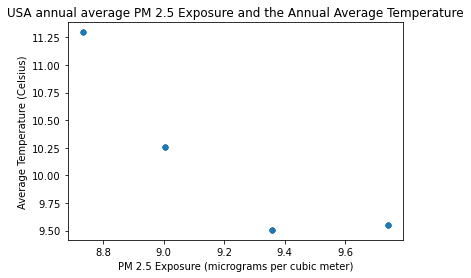

In [195]:
# graph 3
# graph the scatter plot of the Data of USA from 2010 to 2013
# X : PM2.5 micrograms per cubic meter
# Y : Average temperature (Celsius)
us_dot = temp_air.plot(kind="scatter", x="pm2.5", y="Annual Average Temperature")
us_dot.set_ylabel("Average Temperature (Celsius)")
us_dot.set_xlabel("PM 2.5 Exposure (micrograms per cubic meter)")
us_dot.set_title("USA annual average PM 2.5 Exposure and the Annual Average Temperature")

Text(0.5, 1.0, 'The Annual Average Land Temperature in Canada, United States, Mexico, Nicaragua, and Honduras from 2003 to 2013')

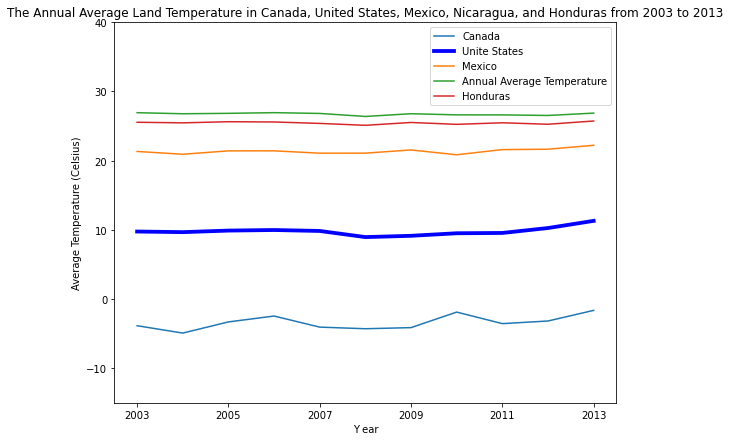

In [208]:
# graph 4:
# A graph of the five largest countries in North America 
# The five largest countries in North America are : Canada, United States, Mexico, Nicaragua, and Honduras
# X : year
# Y : Average Temperature

# First calculate the annual average temperatures for all countries
all_t = pd.DataFrame({ "Country": country_t["Country"], "Year" : [x[:4] for x in country_t["dt"]], 
                      "Average Temperature" : country_t["AverageTemperature"]})
c_annual_avgtemp = all_t[all_t["Year"]>"2002"].groupby(["Country", "Year"])["Average Temperature"]

# Calculate the annual average temperature for each country
an_avg = pd.DataFrame()
an_avg["Annual Average Temperature"] = c_annual_avgtemp.mean()

# Graph the line plot for the five countries
fig, ax = plt.subplots()
ax.set_ylim(-15, 40)
an_avg.groupby("Country").get_group("Canada").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Canada", figsize=(9, 7))
an_avg.groupby("Country").get_group("United States").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Unite States", linewidth=3.8, color="b")
an_avg.groupby("Country").get_group("Mexico").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Mexico")
an_avg.groupby("Country").get_group("Nicaragua").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, Label="Nicaragua")
an_avg.groupby("Country").get_group("Honduras").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Honduras")

ax.legend(loc='upper right')
ax.set_ylabel("Average Temperature (Celsius)")
ax.set_xlabel("Y ear")
ax.set_title("The Annual Average Land Temperature in Canada, United States, Mexico, Nicaragua, and Honduras from 2003 to 2013")